<a href="https://colab.research.google.com/github/Mukolwe29/KCB-Data-science-and-AI/blob/master/Intro_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to regression with DL/ANN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


##Creating data tp view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#features
X = np.array([i for i in range(0,200,3)])


In [ ]:
X

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198])

In [ ]:
# labels
y = (X**2)-4

In [ ]:
y # labels

array([   -4,     5,    32,    77,   140,   221,   320,   437,   572,
         725,   896,  1085,  1292,  1517,  1760,  2021,  2300,  2597,
        2912,  3245,  3596,  3965,  4352,  4757,  5180,  5621,  6080,
        6557,  7052,  7565,  8096,  8645,  9212,  9797, 10400, 11021,
       11660, 12317, 12992, 13685, 14396, 15125, 15872, 16637, 17420,
       18221, 19040, 19877, 20732, 21605, 22496, 23405, 24332, 25277,
       26240, 27221, 28220, 29237, 30272, 31325, 32396, 33485, 34592,
       35717, 36860, 38021, 39200])

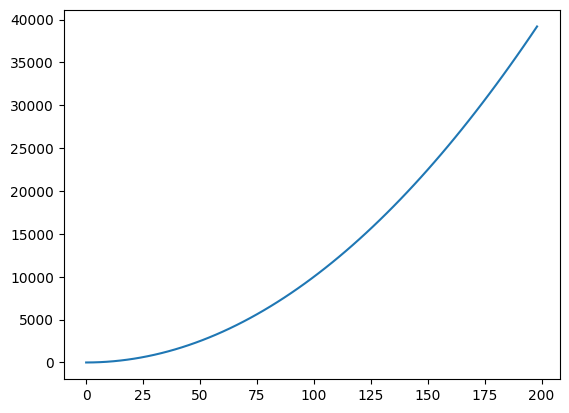

In [ ]:
#visualize the data we created
plt.plot(X,y)

##Split dataset

In [ ]:
#train set
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]

#test set
X_test = X[int(len(X)*0.8):]
y_test = y[int(len(y)*0.8):]

In [ ]:
y_test

array([579, 600, 621, 642, 663, 684, 705])

##Turning data into tensors

In [ ]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)


X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [ ]:
X_train

<tf.Tensor: shape=(27,), dtype=int64, numpy=
array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78])>

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

(TensorShape([27]), TensorShape([27]), TensorShape([7]), TensorShape([7]))

In [ ]:
X_train = tf.expand_dims(X_train, axis = -1)

In [ ]:
X_train

<tf.Tensor: shape=(27, 1), dtype=int64, numpy=
array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18],
       [21],
       [24],
       [27],
       [30],
       [33],
       [36],
       [39],
       [42],
       [45],
       [48],
       [51],
       [54],
       [57],
       [60],
       [63],
       [66],
       [69],
       [72],
       [75],
       [78]])>

#Making the model


1. Create model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Save the model

In [ ]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1), #input shape
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1), #output layer
])

model.compile(
    loss =tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics =["mae"],
    run_eagerly=True)

In [ ]:
model.fit(X_train,y_train, epochs = 1000,verbose=None)

In [ ]:
model.evaluate(x= tf.expand_dims(X_test, axis = -1),y = y_test )

1/1 [==============================] - 0s 79ms/step - loss: 1.2137 - mae: 1.2137


[1.2137014865875244, 1.2137014865875244]

# Evaluating the model

In [ ]:
y_ = model.predict(x= tf.expand_dims(X, axis = -1))

2/2 [==============================] - 0s 10ms/step


In [ ]:
new_y_ = tf.squeeze(y_, axis=None, name=None)

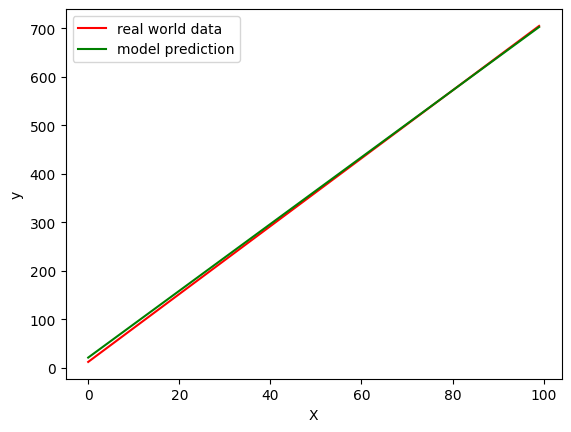

In [ ]:
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='real world data')
plt.plot(X, new_y_, color='g', label='model prediction')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("X")
plt.ylabel("y")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
test_y_ = model.predict(x= tf.expand_dims(X_test, axis = -1))

1/1 [==============================] - 0s 23ms/step


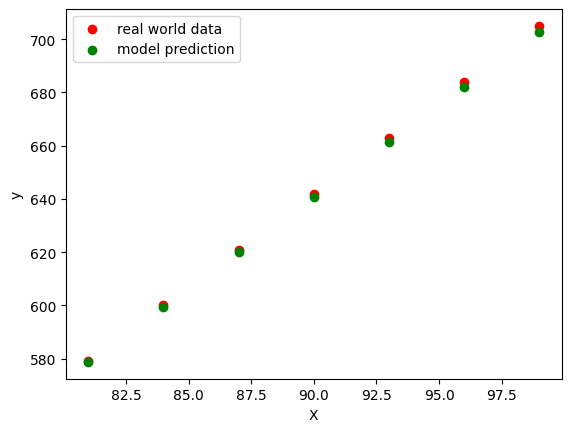

In [ ]:
# Plotting both the curves simultaneously
plt.scatter(X_test, y_test, color='r', label='real world data')
plt.scatter(X_test, test_y_, color='g', label='model prediction')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("X")
plt.ylabel("y")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

##Test the model with new data from a user

In [ ]:
m=7
c=12

m*250+c

1762

In [ ]:
model.predict(x= tf.expand_dims([250], axis = -1))

1/1 [==============================] - 0s 78ms/step


array([[1742.719]], dtype=float32)

In [ ]:
model.save("./model_1")